# Bank turnover Prediction using Artificial Neural Networks (ANN)

- Let's start by importing the necessary libraries

In [30]:
#  import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

- Now, let's load the data

In [31]:
data = pd.read_csv('./Bank-Turnover-Prediction-Using-ANN/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Let's have a look at the shape of our data

In [32]:
data.shape

(10000, 14)

- The data has 10000 rows and 14 columns(features). 
- Let's have a look at the information of the data

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Cleaning

- From the above information of the data we don't need the following columns for the model training
    - RowNumber
    - CustomerId
    - Surname
- Now, let's drop those three columns

In [34]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Now let's check on the data types of each column

In [35]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

- From our data 'Geography' and 'Gender' column contain values with an object type
- Let's have a look at the unique values for the 'Geography' and 'Gender' column 

In [36]:
print(data['Geography'].unique())
print(data['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


- We can on-hot encode the values in the 'Geography' column and also we can replace the values in the 'Gender' column to 1's and 0's. 

In [37]:
data = pd.get_dummies(data=data, columns=['Geography'], dtype=int)
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

## Data Visualization

- Let's have a look at the correlation matrix to see realtions between the columns

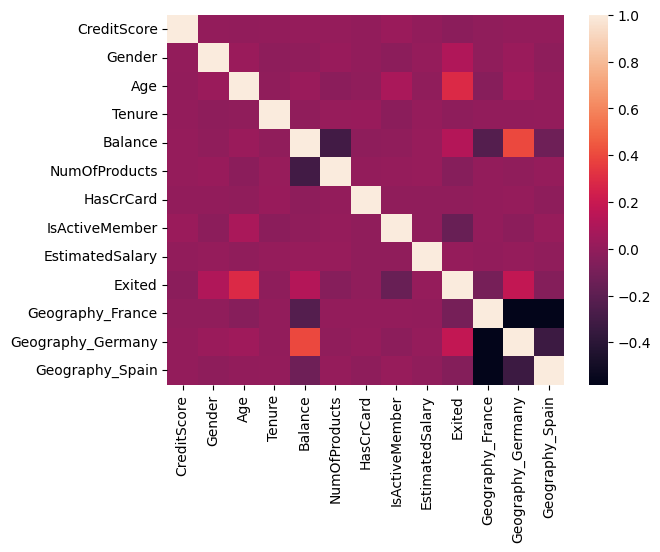

In [38]:
numerical_data = data.select_dtypes(include=[np.number])

# correlation matrix
correaltion_matrix = numerical_data.corr()

# let's visulize the correaltion using a heatmap
sns.heatmap(correaltion_matrix)
plt.show()


- Let's visualize 'Age' vs 'Number of Customers' based on the 'Exited' column

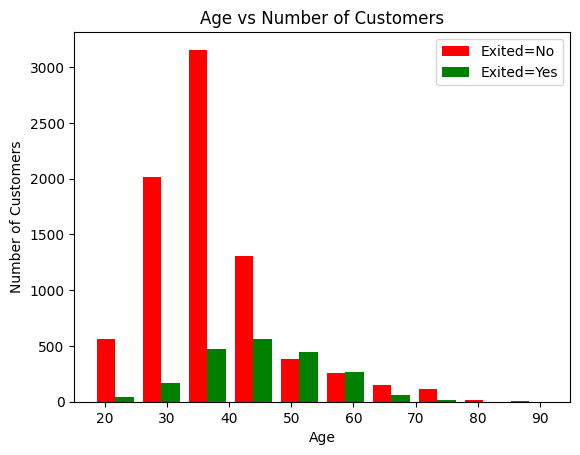

In [39]:
age_exited_no = data[data['Exited'] == 0]['Age']
age_exited_yes = data[data['Exited'] == 1]['Age']

plt.hist([age_exited_no, age_exited_yes], color=['red', 'green'], label = ['Exited=No', 'Exited=Yes'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age vs Number of Customers')
plt.legend()
plt.show()

- A you can see from the above visualization more tahn 1000 customers in the age range 25 - 44 have low churn rate.
- Let's visualize  'tenure' vs 'Number of customers' based on the 'Exited' column
- Tenure is the length of time a customer remains a customer.

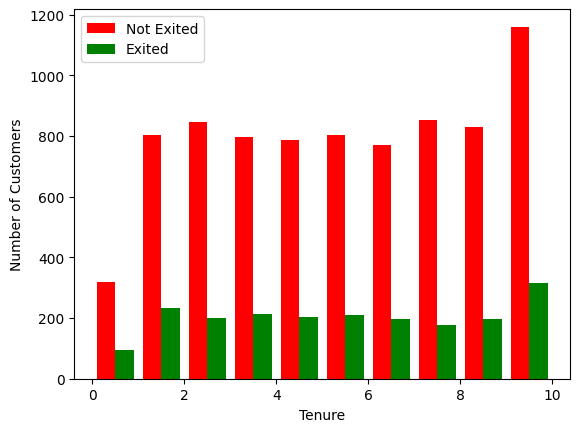

In [40]:
tenure_exited_no = data[data['Exited'] == 0]['Tenure']
tenure_exited_yes = data[data['Exited'] == 1]['Tenure']

plt.hist([tenure_exited_no, tenure_exited_yes], color=['red', 'green'], label=['Not Exited', 'Exited'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

- From the above visualization people more than 1000 customers with high tenure didn't exit